In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Titanic.csv'
data = pd.read_csv(file_path)

In [22]:
sns.set(style="whitegrid")

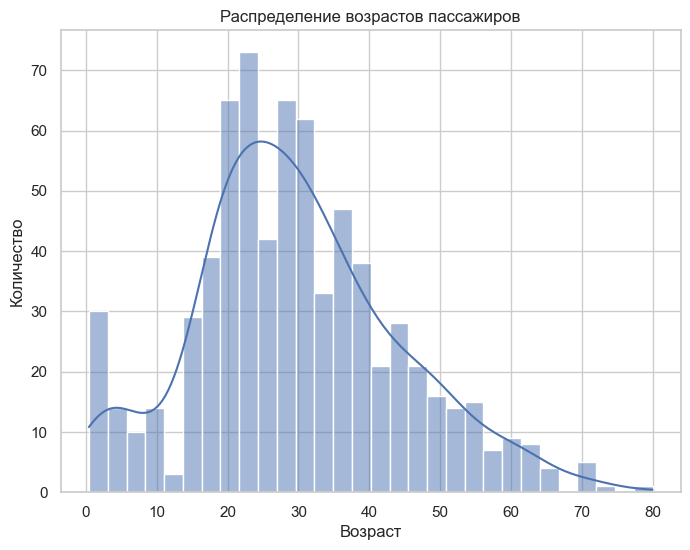

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

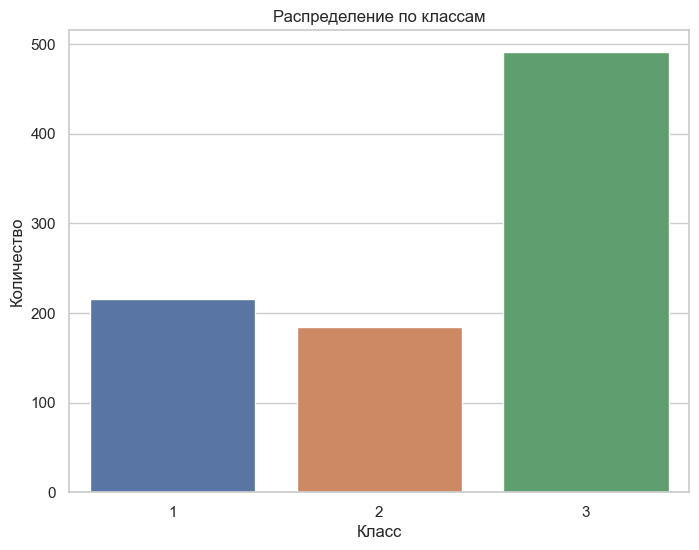

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data)
plt.title('Распределение по классам')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

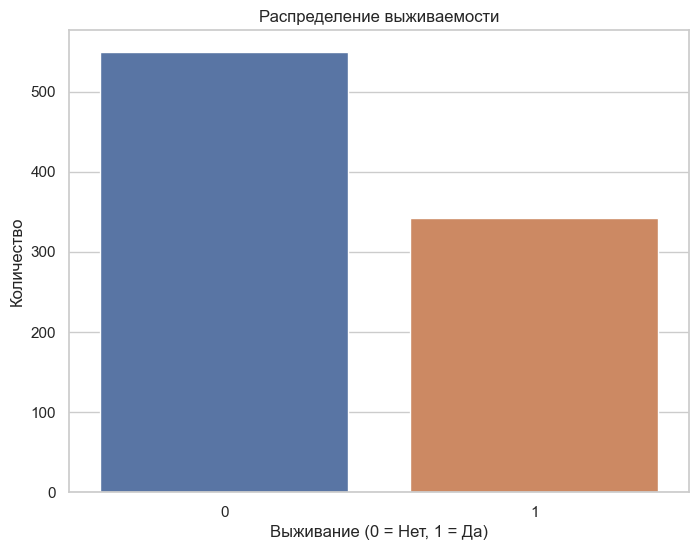

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data)
plt.title('Распределение выживаемости')
plt.xlabel('Выживание (0 = Нет, 1 = Да)')
plt.ylabel('Количество')
plt.show()

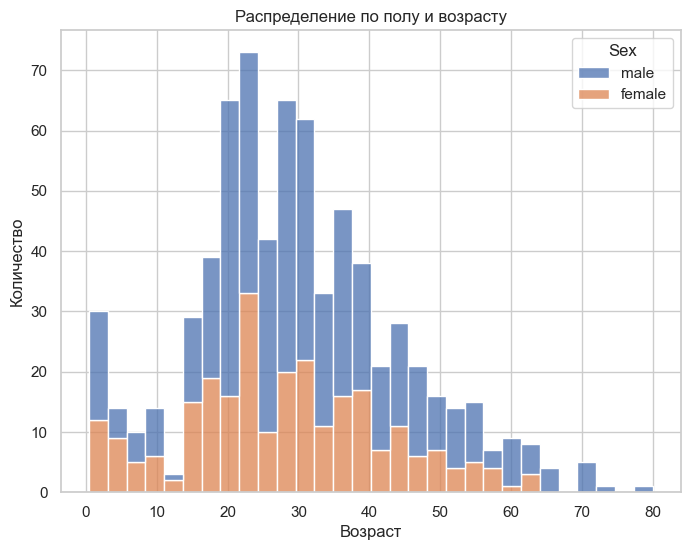

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Sex', multiple='stack', bins=30)
plt.title('Распределение по полу и возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

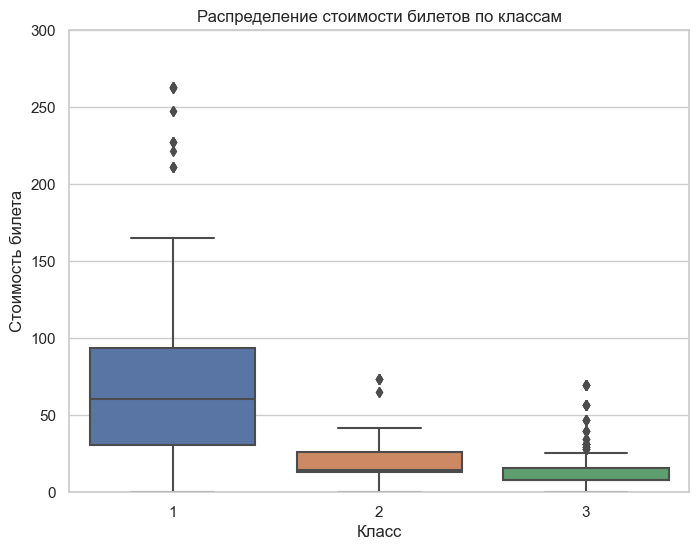

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Распределение стоимости билетов по классам')
plt.xlabel('Класс')
plt.ylabel('Стоимость билета')
plt.ylim(0, 300)  # Ограничим ось для наглядности
plt.show()

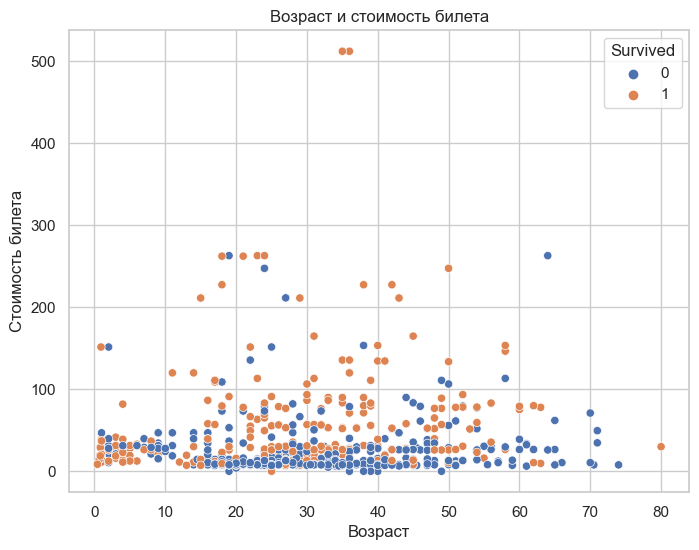

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Возраст и стоимость билета')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.show()

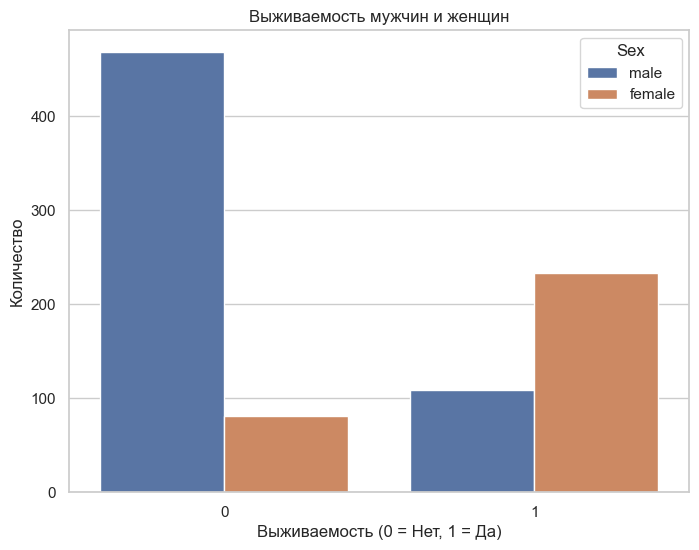

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Выживаемость мужчин и женщин')
plt.xlabel('Выживаемость (0 = Нет, 1 = Да)')
plt.ylabel('Количество')
plt.show()

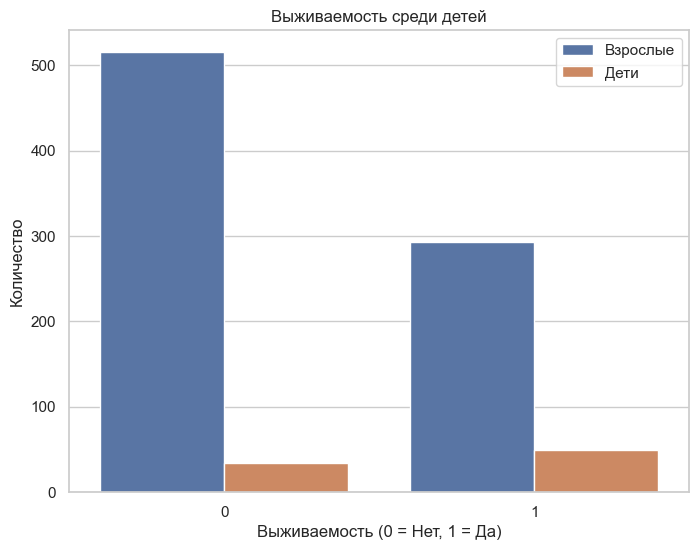

In [12]:
data['IsChild'] = data['Age'] < 16
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='IsChild', data=data)
plt.title('Выживаемость среди детей')
plt.xlabel('Выживаемость (0 = Нет, 1 = Да)')
plt.ylabel('Количество')
plt.legend(['Взрослые', 'Дети'])
plt.show()

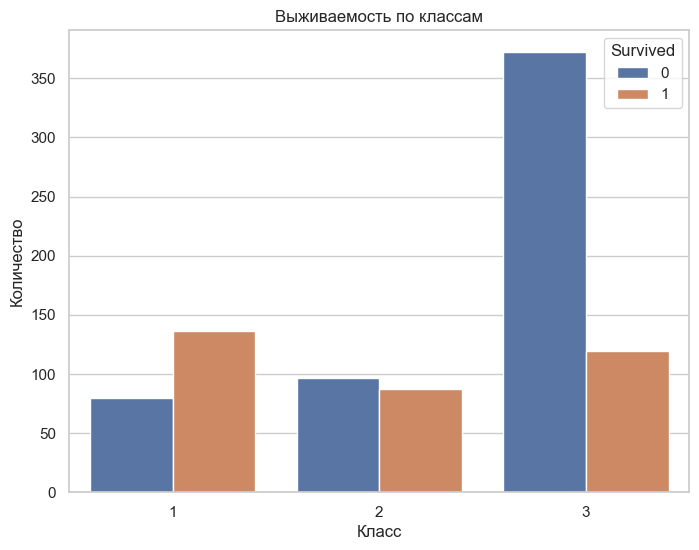

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Выживаемость по классам')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

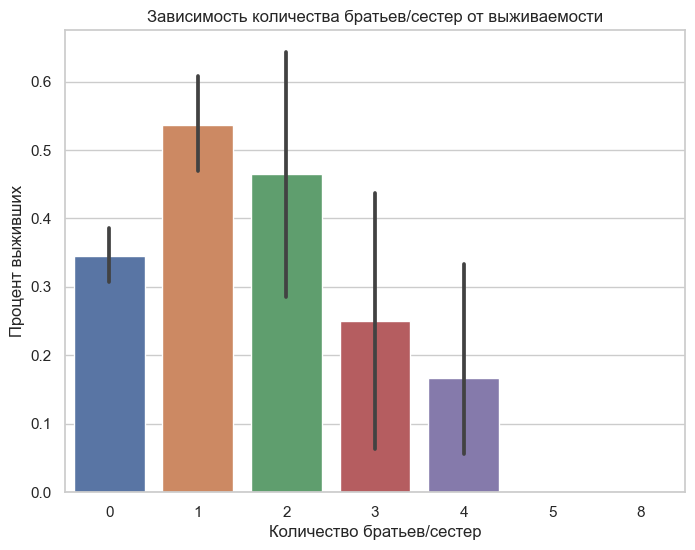

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title('Зависимость количества братьев/сестер от выживаемости')
plt.xlabel('Количество братьев/сестер')
plt.ylabel('Процент выживших')
plt.show()

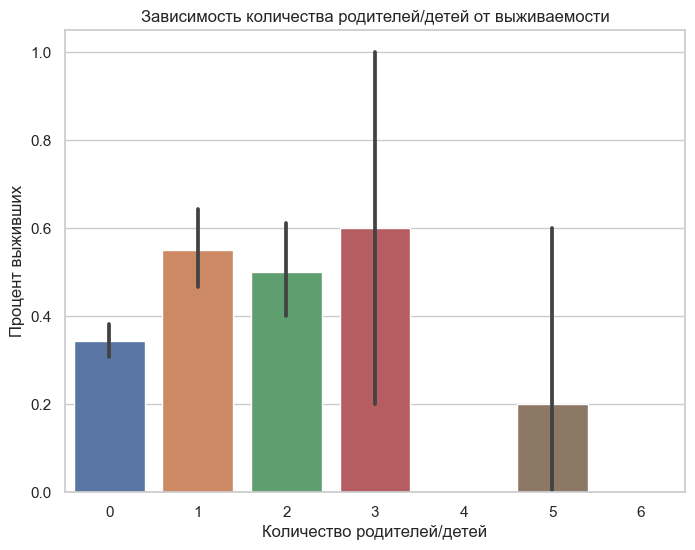

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Parch', y='Survived', data=data)
plt.title('Зависимость количества родителей/детей от выживаемости')
plt.xlabel('Количество родителей/детей')
plt.ylabel('Процент выживших')
plt.show()

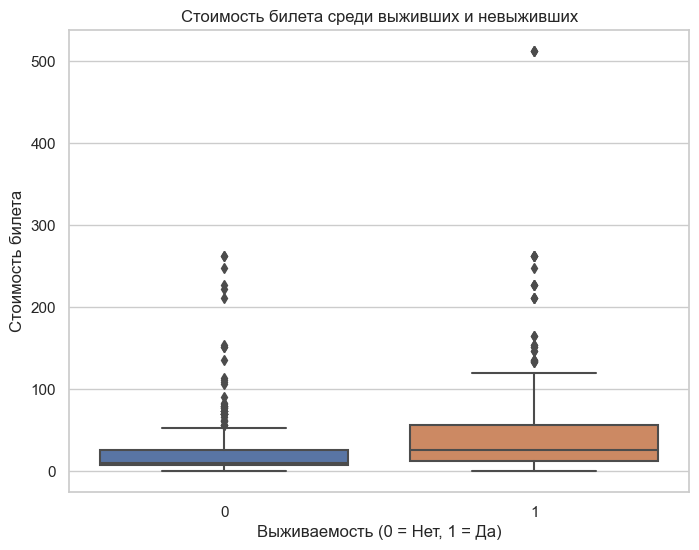

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Стоимость билета среди выживших и невыживших')
plt.xlabel('Выживаемость (0 = Нет, 1 = Да)')
plt.ylabel('Стоимость билета')
plt.show()

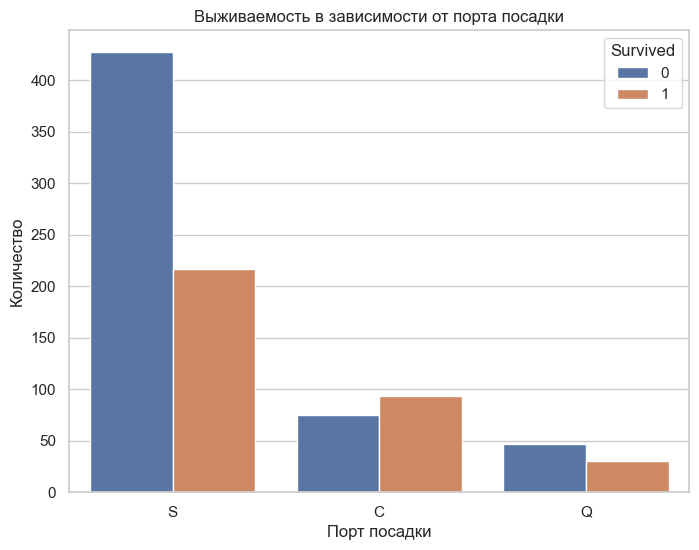

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Выживаемость в зависимости от порта посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество')
plt.show()


Epoch 1/20


18/18 [==============================] - 1s 13ms/step - loss: 0.9772 - accuracy: 0.6426 - val_loss: 0.9374 - val_accuracy: 0.7483
Epoch 2/20
18/18 [==============================] - 0s 3ms/step - loss: 0.8758 - accuracy: 0.7852 - val_loss: 0.8504 - val_accuracy: 0.7552
Epoch 3/20
18/18 [==============================] - 0s 3ms/step - loss: 0.7777 - accuracy: 0.8063 - val_loss: 0.7651 - val_accuracy: 0.7902
Epoch 4/20
18/18 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.8151 - val_loss: 0.7233 - val_accuracy: 0.7762
Epoch 5/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.8222 - val_loss: 0.7048 - val_accuracy: 0.7832
Epoch 6/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.8310 - val_loss: 0.6857 - val_accuracy: 0.7762
Epoch 7/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6081 - accuracy: 0.8363 - val_loss: 0.6752 - val_accuracy: 0.7762
Epoch 8/20
18/18

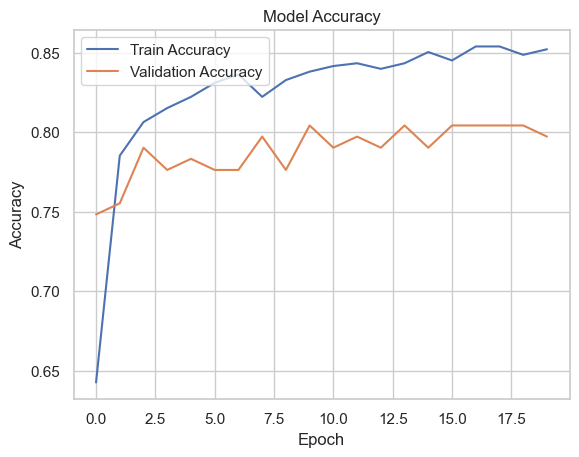

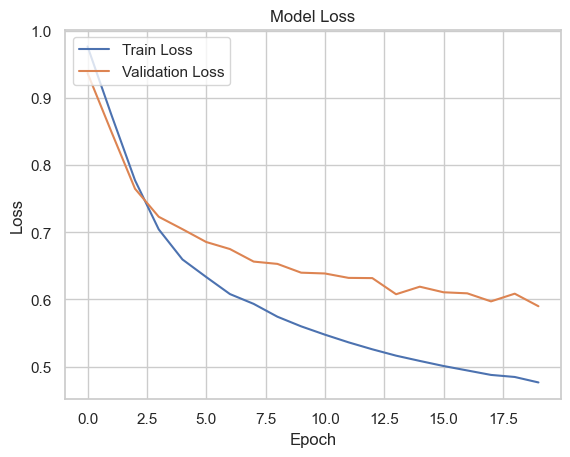

In [26]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Строим модель
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.008), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))  # Выходной слой для бинарной классификации

# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Построим график точности
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Построим график потерь
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()
